
# Importing Libraries

In [65]:
%matplotlib inline

from os import path
import autolens as al
import autolens.plot as aplt

## Defining the image grid

In [66]:
image_plane_grid = al.Grid2D.uniform(
    shape_native=(250, 250), pixel_scales=0.05, sub_size=2
)

## Creating the lens galaxy

In order to simulate the effects of lensing from a linear mass density I have used the point mass profile. To create a galaxy of a string of masses (linear mass density) I just made a galaxy with multiple co-linear point masses arranges one after another.

In [78]:
mass_profiles_val = {}
counter = 0
for i in range(-25,-1):
    mass_profiles_val['mass_'+str(counter)] = al.mp.PointMass(centre=(0.05*i, 0), einstein_radius=1.6)
    counter = counter +1

    
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass1= mass_profiles_val['mass_1'],
    mass2= mass_profiles_val['mass_2'],
    mass3= mass_profiles_val['mass_3'],
    mass4= mass_profiles_val['mass_4'],
    mass5= mass_profiles_val['mass_5'],
    mass6= mass_profiles_val['mass_6'],
    mass7= mass_profiles_val['mass_7'],
    mass8= mass_profiles_val['mass_8'],
    mass9= mass_profiles_val['mass_9'],
    mass10= mass_profiles_val['mass_10'],  

)


print(lens_galaxy)

Redshift: 0.5
Mass Profiles:
PointMass
centre: (-1.2000000000000002, 0)
einstein_radius: 1.6
PointMass
centre: (-1.1500000000000001, 0)
einstein_radius: 1.6
PointMass
centre: (-1.1, 0)
einstein_radius: 1.6
PointMass
centre: (-1.05, 0)
einstein_radius: 1.6
PointMass
centre: (-1.0, 0)
einstein_radius: 1.6
PointMass
centre: (-0.9500000000000001, 0)
einstein_radius: 1.6
PointMass
centre: (-0.9, 0)
einstein_radius: 1.6
PointMass
centre: (-0.8500000000000001, 0)
einstein_radius: 1.6
PointMass
centre: (-0.8, 0)
einstein_radius: 1.6
PointMass
centre: (-0.75, 0)
einstein_radius: 1.6


## Creating the Source galaxy

In [79]:
sersic_light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = al.Galaxy(redshift=1.0, light=sersic_light_profile)

print(source_galaxy)

Redshift: 1.0
Light Profiles:
SphericalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 1.0


## Lets have a look at the source galaxy without the interference of the lens galaxy

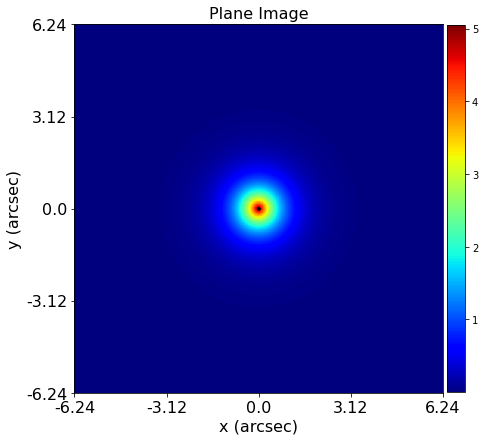

In [80]:
include_2d = aplt.Include2D(grid=False)
image_plane = al.Plane(galaxies=[lens_galaxy])
source_plane = al.Plane(galaxies=[source_galaxy])
source_plane_grid = image_plane.traced_grid_from_grid(grid=image_plane_grid)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, include_2d=include_2d
)

plane_plotter.figures(plane_image=True)

## Adding the source and lens galaxy to thr tracer

In [81]:
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

 Lets trace back the source galaxy to the image plane (this is what the observer will actually see)

In [82]:
traced_image = tracer.image_from_grid(grid=image_plane_grid)


In [83]:
print("traced image pixel 1")
print(traced_image.native[0, 0])
print("traced image pixel 2")
print(traced_image.native[0, 1])
print("traced image pixel 3")
print(traced_image.native[0, 2])

traced image pixel 1
0.00017729942921209724
traced image pixel 2
0.00018404329914354587
traced image pixel 3
0.0001910339827130517


## Lets now have a look at the source galaxy (from the observer's point of view)


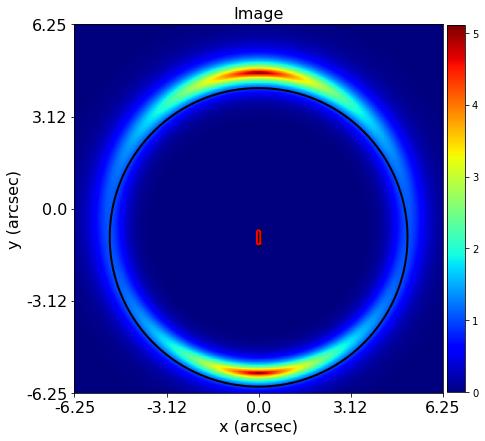

In [84]:
tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=image_plane_grid)
tracer_plotter.figures(image=True)

In [85]:
traced_grids = tracer.traced_grids_of_planes_from_grid(grid=image_plane_grid)
print("grid source-plane coordinate 1")
print(traced_grids[1].native[0, 0])
print("grid source-plane coordinate 2")
print(traced_grids[1].native[0, 1])
print("grid source-plane coordinate 3")
print(traced_grids[1].native[0, 2])

grid source-plane coordinate 1
[ 4.20717824 -4.48084436]
grid source-plane coordinate 2
[ 4.20020188 -4.45687049]
grid source-plane coordinate 3
[ 4.19320569 -4.432928  ]


In [86]:
traced_grids = tracer.traced_grids_of_planes_from_grid(grid=image_plane_grid)

## Plot of the source plane grid

We can see that the lens galaxy has completely changed the source grid

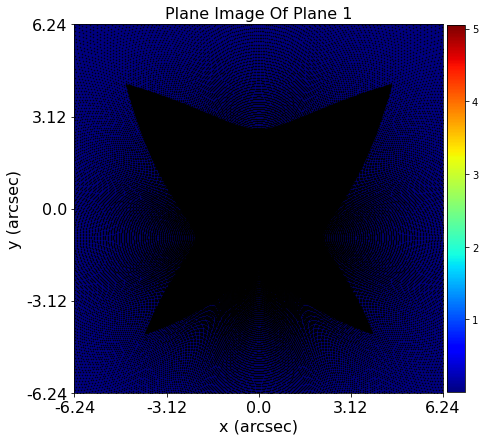

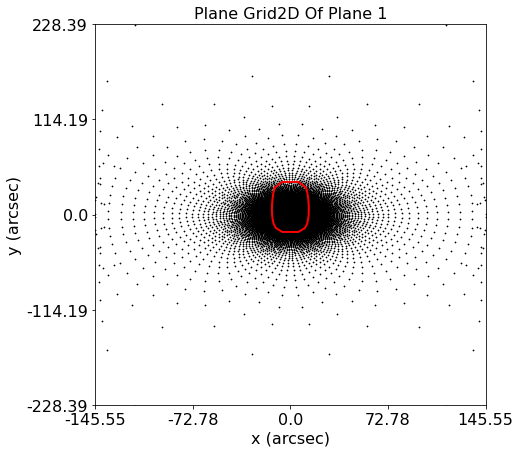

In [87]:
include_2d = aplt.Include2D(grid=True)

tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=image_plane_grid, include_2d=include_2d
)
tracer_plotter.figures_of_planes(plane_image=True, plane_grid=True, plane_index=1)

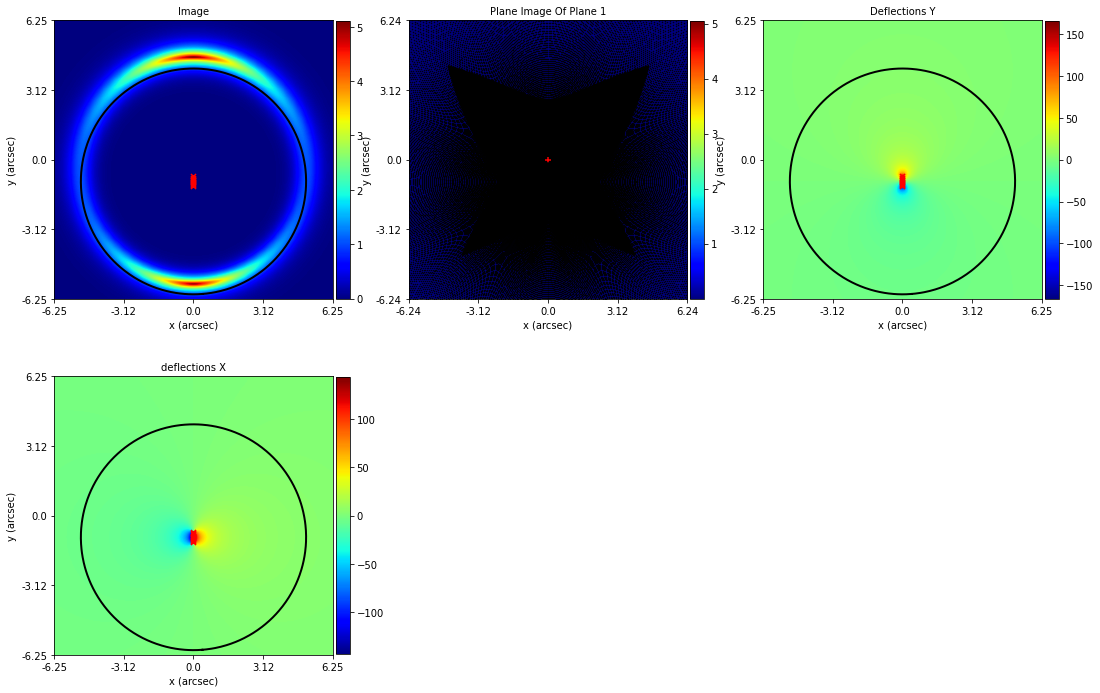

In [88]:
tracer_plotter.subplot_tracer()